In [143]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data

In [144]:
train = pd.read_csv('../dataset/train.csv')
test = pd.read_csv('../dataset/test.csv')

In [145]:
train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

#### Column Descriptions  :


- `PassengerId` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- `HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.
- `CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- `Cabin` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- `Destination` - The planet the passenger will be debarking to.
- `Age` - The age of the passenger.
- `VIP` - Whether the passenger has paid for special VIP service during the voyage.
- `RoomService`, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- `Name` - The first and last names of the passenger.
- `Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.



#### Train dataset

In [146]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [147]:
train.isna().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

In [148]:
print(f'Number of rows in training dataset = {train.shape[0]}')
print(f'Number of columns in training dataset = {train.shape[1]}')
print(f'Number of datapoints in training dataset = {train.count().sum()}')
print(f'Number of missing values in training dataset = {train.isnull().sum().sum()}')

Number of rows in training dataset = 8693
Number of columns in training dataset = 14
Number of datapoints in training dataset = 119378
Number of missing values in training dataset = 2324


#### Test Dataset

In [149]:
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [150]:
test.isna().sum().sort_values(ascending=False)

FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64

In [151]:
print(f'Number of rows in training dataset = {test.shape[0]}')
print(f'Number of columns in training dataset = {test.shape[1]}')
print(f'Number of datapoints in training dataset = {test.count().sum()}')
print(f'Number of missing values in training dataset = {test.isnull().sum().sum()}')

Number of rows in training dataset = 4277
Number of columns in training dataset = 13
Number of datapoints in training dataset = 54484
Number of missing values in training dataset = 1117


In [152]:
print(f'Duplicates in Train Dataset : {train.duplicated().sum()}')
print(f'Duplicates in Test Dataset : {train.duplicated().sum()}')

Duplicates in Train Dataset : 0
Duplicates in Test Dataset : 0


In [153]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

In [154]:
train.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

### EDA

#### Target Feature

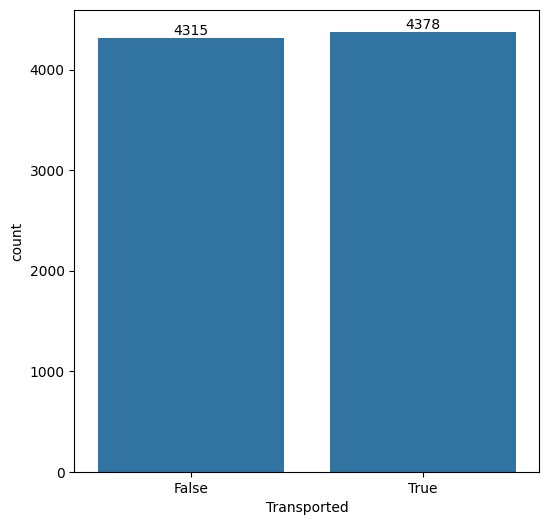

In [155]:
plt.figure(figsize=(6,6))
ax = sns.barplot(train['Transported'].value_counts())
ax.bar_label(ax.containers[0])
plt.show()

#### Age

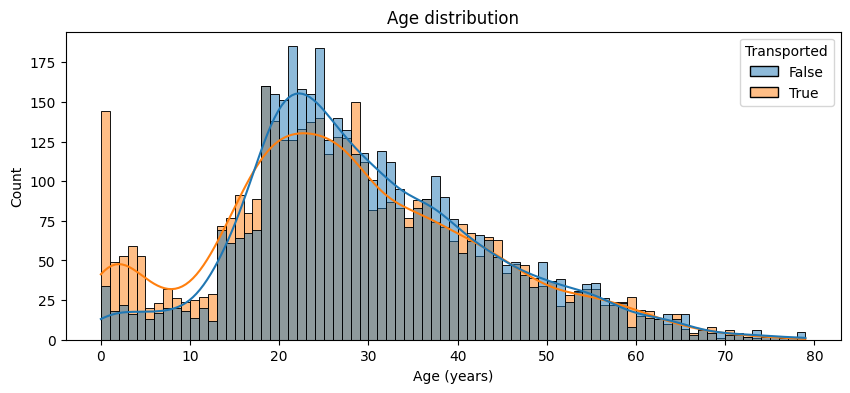

In [156]:
plt.figure(figsize=(10,4))
sns.histplot(data=train, x='Age', hue='Transported', binwidth=1, kde=True)
plt.title('Age distribution')
plt.xlabel('Age (years)')
plt.show()

#### Expenditure Feature

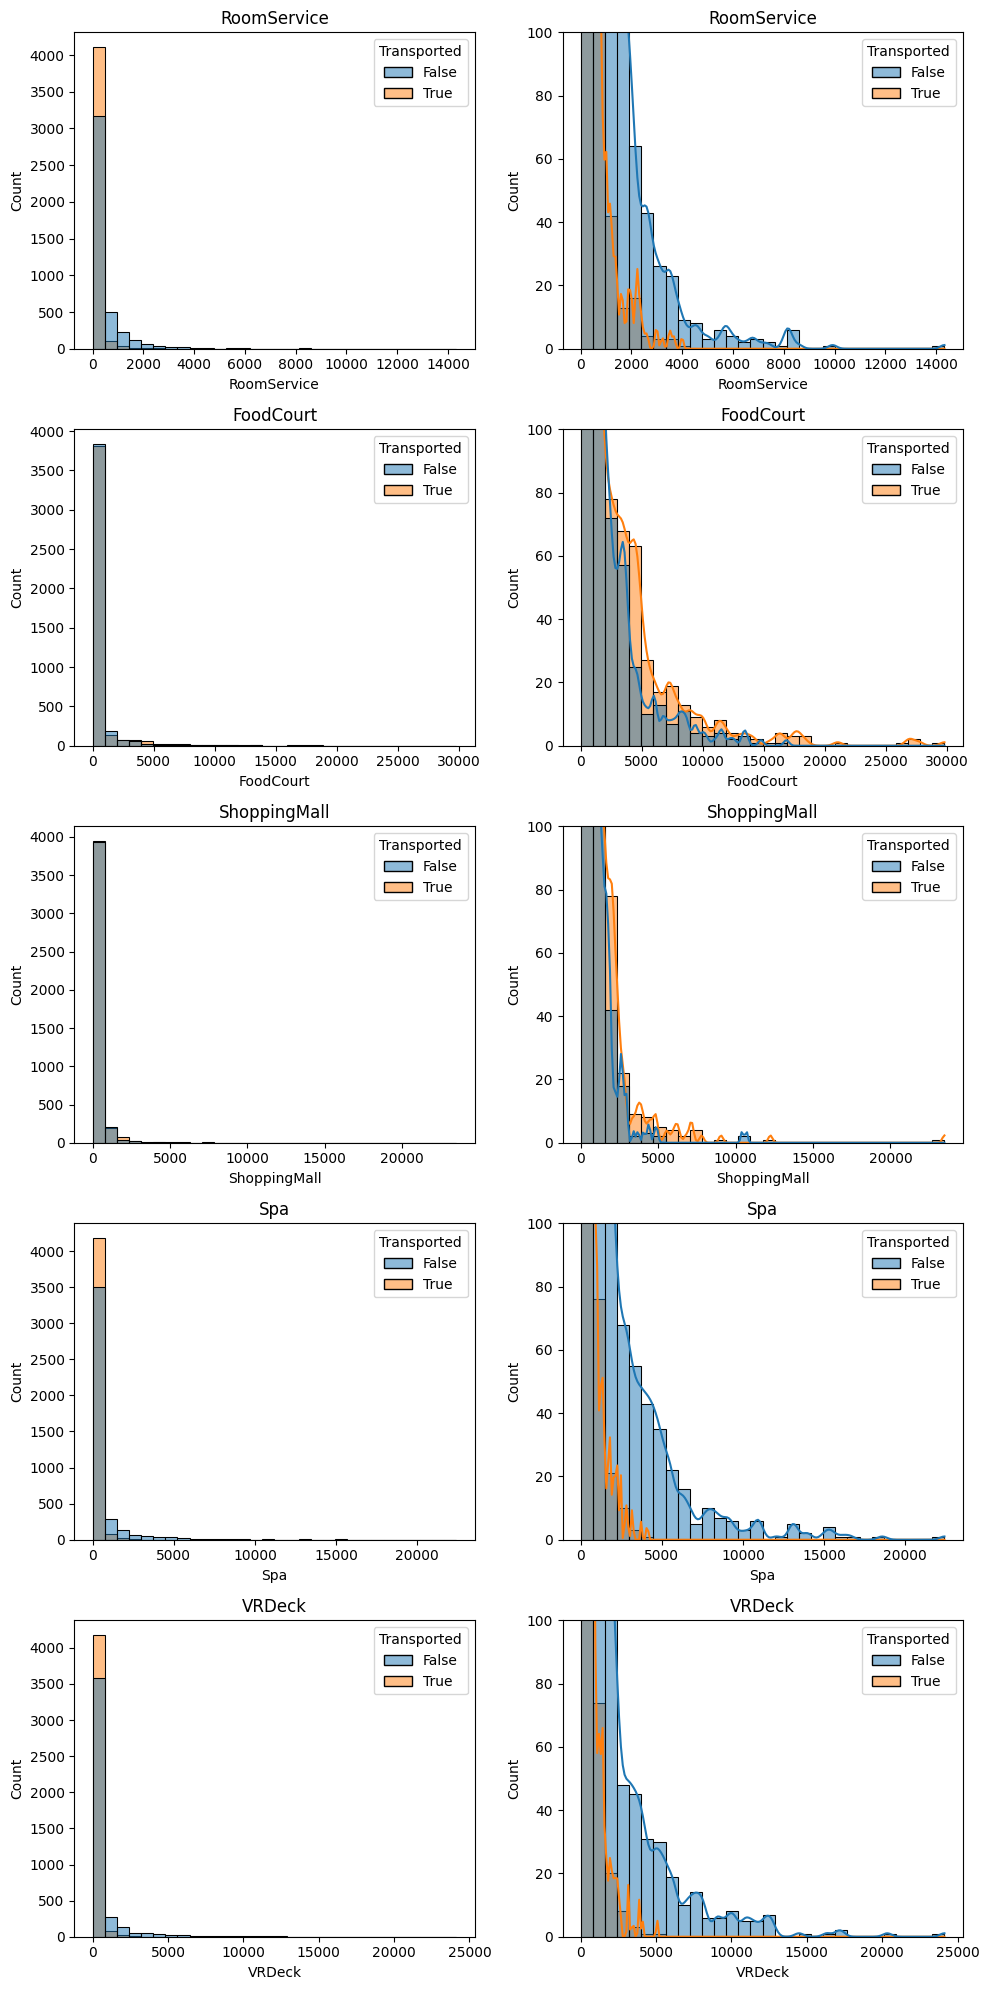

In [157]:
exp_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig=plt.figure(figsize=(10,20))
for i, var_name in enumerate(exp_features):
    ax=fig.add_subplot(5,2,2*i+1)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=False, hue='Transported')
    ax.set_title(var_name)
    ax=fig.add_subplot(5,2,2*i+2)
    sns.histplot(data=train, x=var_name, axes=ax, bins=30, kde=True, hue='Transported')
    plt.ylim([0,100])
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

#### Categorical Feature

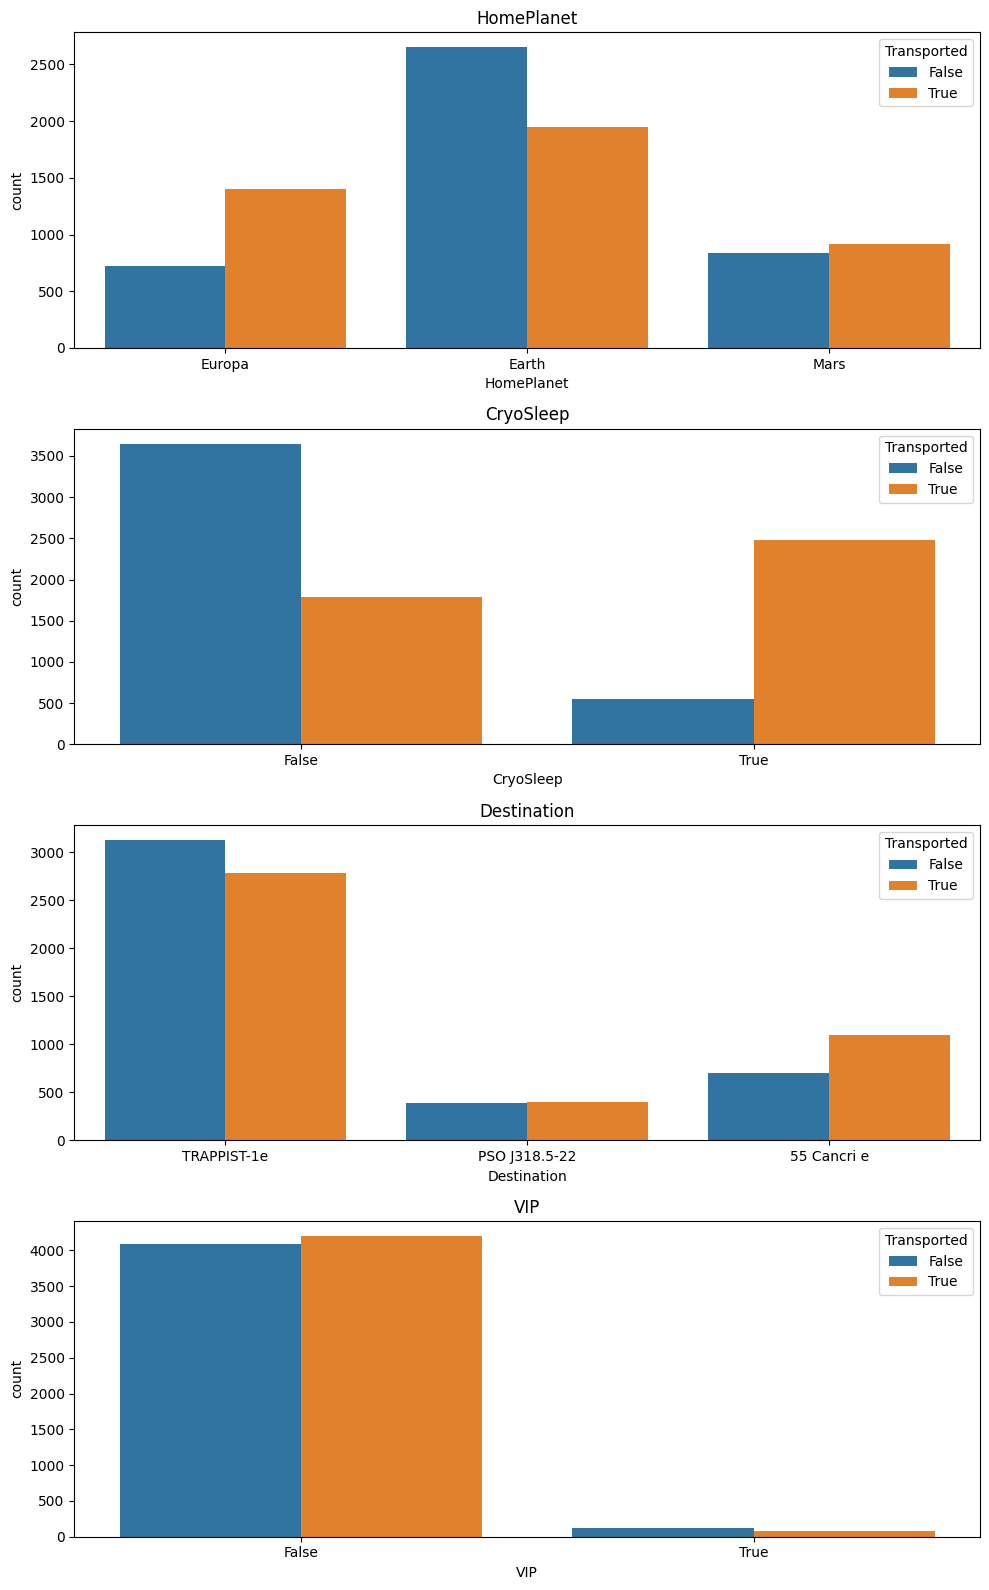

In [158]:
cat_feats=['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
fig=plt.figure(figsize=(10,16))
for i, var_name in enumerate(cat_feats):
    ax=fig.add_subplot(4,1,i+1)
    sns.countplot(data=train, x=var_name, axes=ax, hue='Transported')
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

#### Qualitative features


In [159]:
qual_feats=['PassengerId', 'Cabin' ,'Name']
train[qual_feats].head()

,PassengerId,Cabin,Name
0,0001_01,B/0/P,Maham Ofracculy
1,0002_01,F/0/S,Juanna Vines
2,0003_01,A/0/S,Altark Susent
3,0003_02,A/0/S,Solam Susent
4,0004_01,F/1/S,Willy Santantines


### Feature Engineering

The philosophy to feature engineering is simple. ***Better features make better models.***

In [160]:
def age_group(df):
    df['Age_group'] = np.nan
    df.loc[df['Age']<=12, 'Age_group'] = 'Age_0-12'
    df.loc[(df['Age']>12) & (df['Age']<18), 'Age_group'] = 'Age_13-17'
    df.loc[(df['Age']>=18) & (df['Age']<=25), 'Age_group'] = 'Age_18-25'
    df.loc[(df['Age']>25) & (df['Age']<=30), 'Age_group'] = 'Age_26-30'
    df.loc[(df['Age']>30) & (df['Age']<=50), 'Age_group'] = 'Age_31-50'
    df.loc[df['Age']>50, 'Age_group'] = 'Age_51+'
    return df

In [161]:
train = age_group(train)
test = age_group(test)

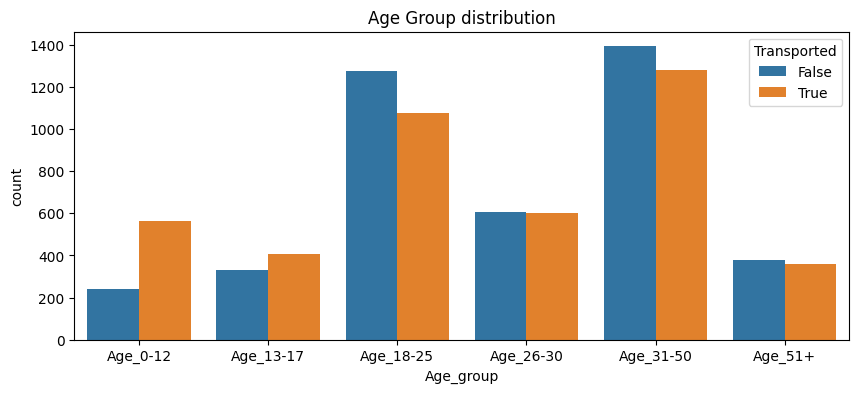

In [162]:
plt.figure(figsize=(10, 4))
ax = sns.countplot(data=train, x='Age_group', hue='Transported', order=['Age_0-12','Age_13-17', 'Age_18-25', 'Age_26-30','Age_31-50', 'Age_51+'])
plt.title('Age Group distribution')
plt.show()

In [163]:
def expenditure(df):
    df['Expenditure'] = df[exp_features].sum(axis=1)
    df['No_spending'] = (df['Expenditure']==0).astype(int)
    return df

In [164]:
train = expenditure(train)
test = expenditure(test)

In [165]:
train['Expenditure'].describe()

count     8693.000000
mean      1440.866329
std       2803.045694
min          0.000000
25%          0.000000
50%        716.000000
75%       1441.000000
max      35987.000000
Name: Expenditure, dtype: float64

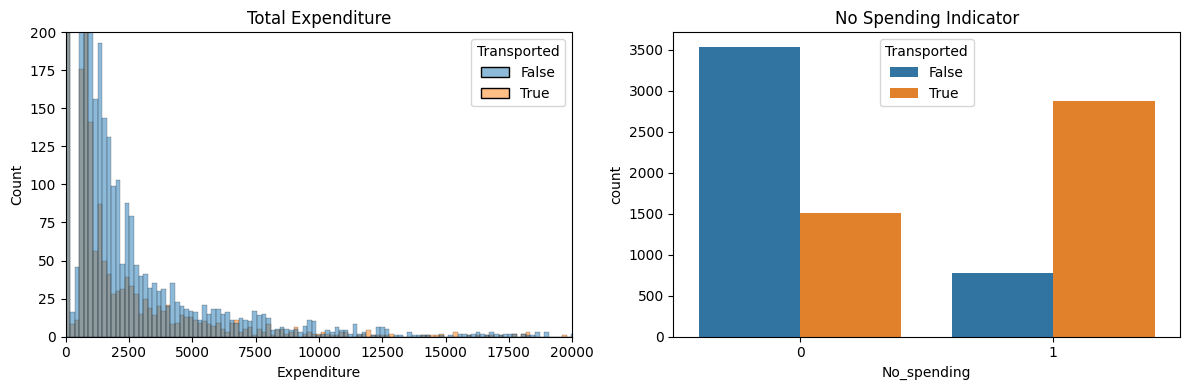

In [166]:
fig = plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=train, x='Expenditure', hue='Transported', bins=200)
plt.title('Total Expenditure')
plt.ylim([0, 200])
plt.xlim([0, 20000])
plt.subplot(1, 2, 2)
sns.countplot(data=train, x='No_spending', hue='Transported')
plt.title('No Spending Indicator')
plt.tight_layout()
plt.show()

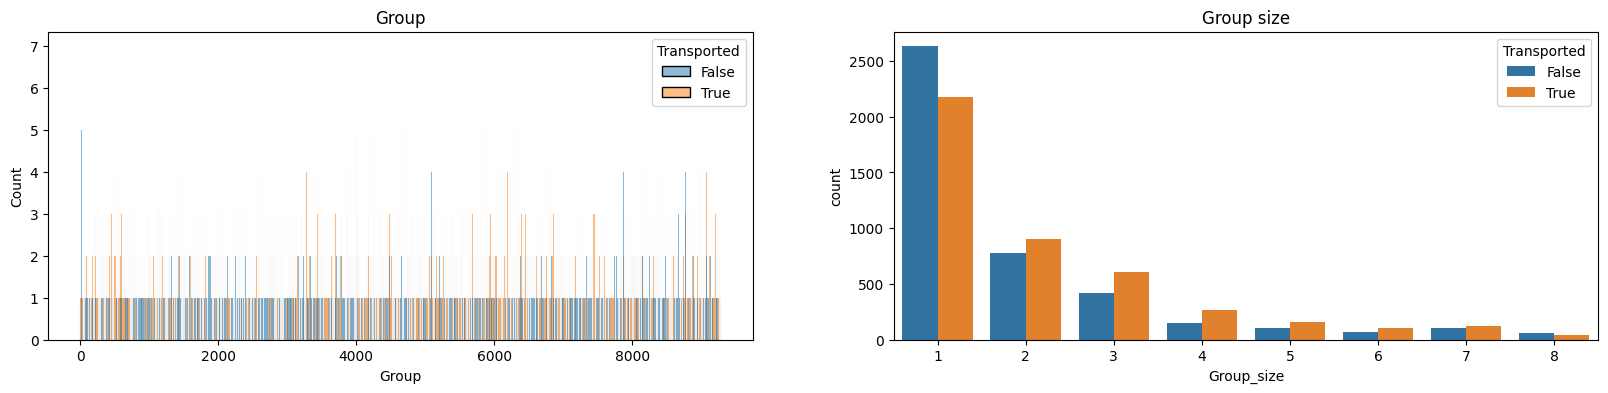

In [167]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
test['Group'] = test['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])
test['Group_size']=test['Group'].map(lambda x: pd.concat([train['Group'], test['Group']]).value_counts()[x])

plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.histplot(data=train, x='Group', hue='Transported', binwidth=1)
plt.title('Group')

plt.subplot(1,2,2)
sns.countplot(data=train, x='Group_size', hue='Transported')
plt.title('Group size')
fig.tight_layout()

In [168]:
def travelling_solo_or_not(df):
    df['Solo'] = (df['Group_size'] == 1).astype(int)
    return df

In [169]:
train = travelling_solo_or_not(train)
test = travelling_solo_or_not(test)

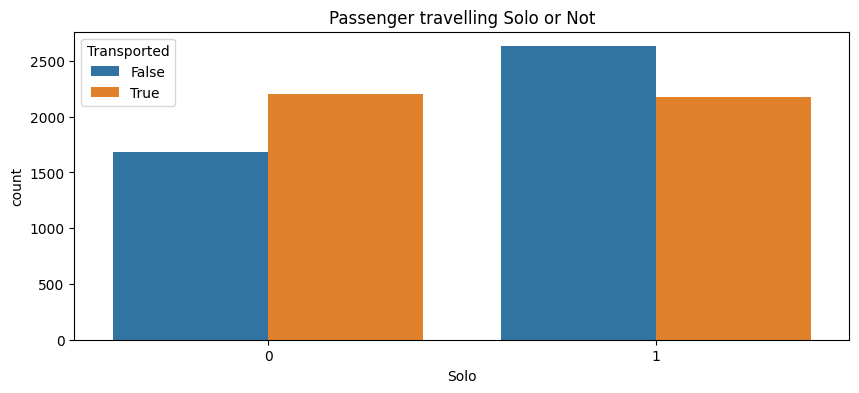

In [170]:
plt.figure(figsize=(10, 4))
sns.countplot(data=train, x = 'Solo', hue='Transported')
plt.title('Passenger travelling Solo or Not')
plt.show()

In [171]:
def cabin_extract(df):
    df['Cabin'].fillna('Z/9999/Z', inplace = True)
    df['Cabin_deck'] = df['Cabin'].apply(lambda x: x.split('/')[0])
    df['Cabin_number'] = df['Cabin'].apply(lambda x: x.split('/')[1]).astype(int)
    df['Cabin_side'] = df['Cabin'].apply(lambda x: x.split('/')[2])
    df.loc[df['Cabin_deck']=='Z', 'Cabin_deck'] = np.nan
    df.loc[df['Cabin_number']==9999, 'Cabin_number'] = np.nan
    df.loc[df['Cabin_side']=='Z', 'Cabin_side'] = np.nan
    df.drop('Cabin', axis = 1, inplace = True)
    return df

In [172]:
train = cabin_extract(train)
test = cabin_extract(test)

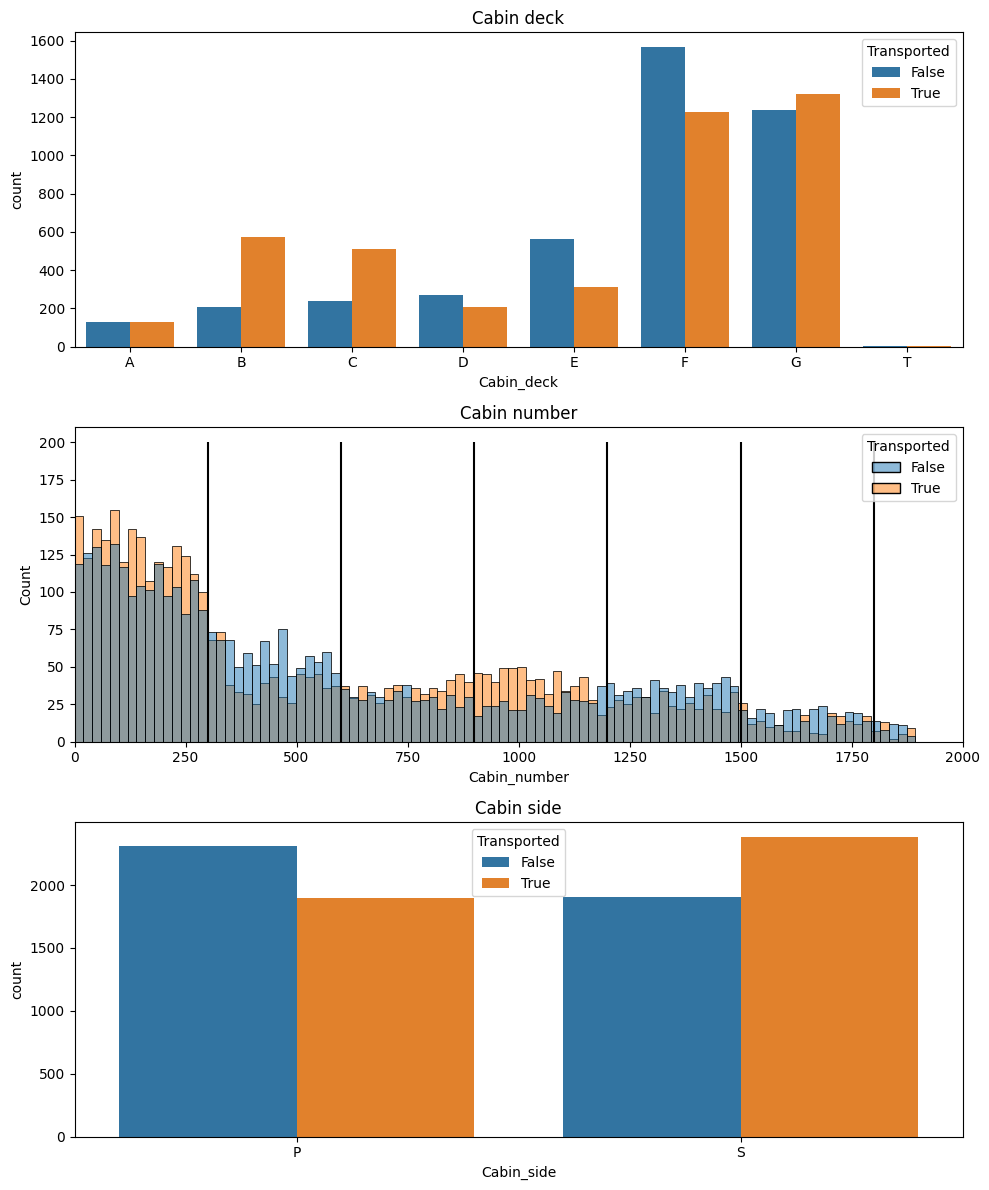

In [173]:
fig = plt.figure(figsize=(10, 12))
plt.subplot(3, 1, 1)
sns.countplot(data=train, x='Cabin_deck', hue='Transported', order=['A','B','C','D','E','F','G','T'])
plt.title('Cabin deck')

plt.subplot(3,1,2)
sns.histplot(data=train, x='Cabin_number', hue='Transported',binwidth=20)
plt.vlines(300, ymin=0, ymax=200, color='black')
plt.vlines(600, ymin=0, ymax=200, color='black')
plt.vlines(900, ymin=0, ymax=200, color='black')
plt.vlines(1200, ymin=0, ymax=200, color='black')
plt.vlines(1500, ymin=0, ymax=200, color='black')
plt.vlines(1800, ymin=0, ymax=200, color='black')
plt.title('Cabin number')
plt.xlim([0,2000])

plt.subplot(3,1,3)
sns.countplot(data=train, x='Cabin_side', hue='Transported')
plt.title('Cabin side')
fig.tight_layout()

In [174]:
def cabin_region(df):
    df['Cabin_region1'] = (df['Cabin_number']<300).astype(int)
    df['Cabin_region2'] = ((df['Cabin_number']>=300) & (df['Cabin_number']<600)).astype(int)
    df['Cabin_region3'] = ((df['Cabin_number']>=600) & (df['Cabin_number']<900)).astype(int)
    df['Cabin_region4'] = ((df['Cabin_number']>=900) & (df['Cabin_number']<1200)).astype(int)
    df['Cabin_region5'] = ((df['Cabin_number']>=1200) & (df['Cabin_number']<1500)).astype(int)
    df['Cabin_region6'] = ((df['Cabin_number']>=1500) & (df['Cabin_number']<1800)).astype(int)
    df['Cabin_region7'] = (df['Cabin_number']>=1800).astype(int)
    return df

In [175]:
train = cabin_region(train)
test = cabin_region(test)

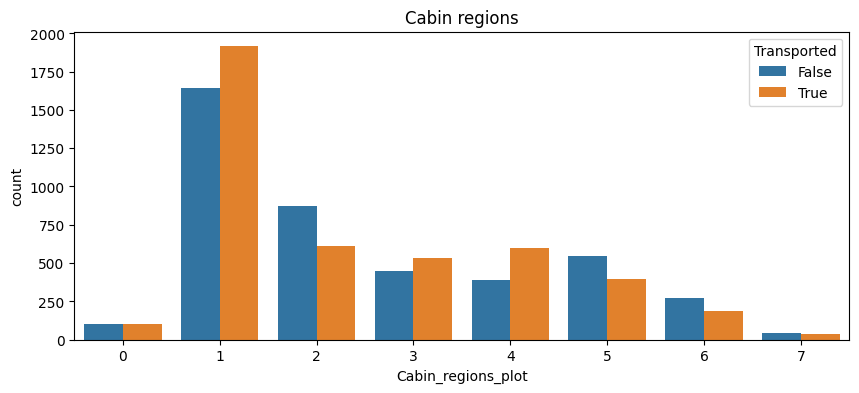

In [126]:
plt.figure(figsize=(10, 4))
train['Cabin_regions_plot']=(train['Cabin_region1']+
                             2*train['Cabin_region2']+
                             3*train['Cabin_region3']+
                             4*train['Cabin_region4']+
                             5*train['Cabin_region5']+
                             6*train['Cabin_region6']+
                             7*train['Cabin_region7']).astype(int)
sns.countplot(data=train, x='Cabin_regions_plot', hue='Transported')
plt.title('Cabin regions')
train.drop('Cabin_regions_plot', axis=1, inplace=True)

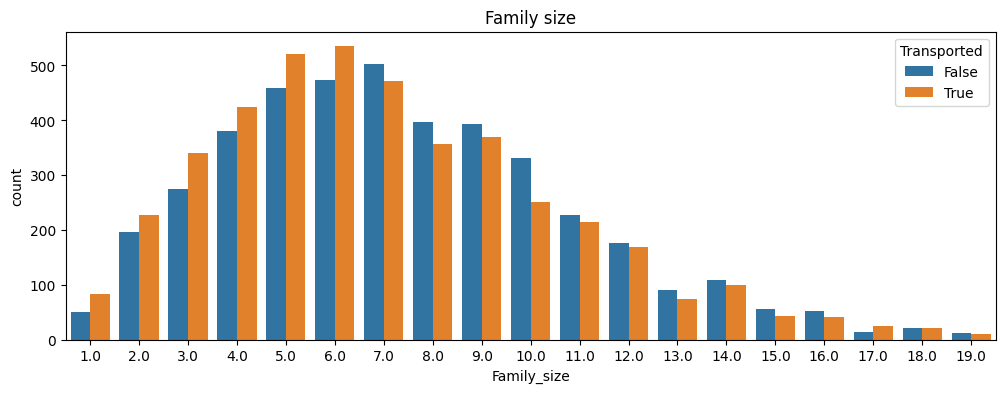

In [176]:
train['Name'].fillna('Unknown Unknown', inplace=True)
test['Name'].fillna('Unknown Unknown', inplace=True)

train['Surname']=train['Name'].str.split().str[-1]
test['Surname']=test['Name'].str.split().str[-1]

train['Family_size']=train['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])
test['Family_size']=test['Surname'].map(lambda x: pd.concat([train['Surname'],test['Surname']]).value_counts()[x])

train.loc[train['Surname']=='Unknown','Surname']=np.nan
train.loc[train['Family_size']>100,'Family_size']=np.nan
test.loc[test['Surname']=='Unknown','Surname']=np.nan
test.loc[test['Family_size']>100,'Family_size']=np.nan

train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

plt.figure(figsize=(12,4))
sns.countplot(data=train, x='Family_size', hue='Transported')
plt.title('Family size')
plt.show()

#### Missing Value Imputation

In [177]:
y = train['Transported'].copy().astype(int)
X = train.drop('Transported', axis=1).copy()

data = pd.concat([X, test], axis=0).reset_index(drop=True)

In [181]:
na_cols = data.columns[data.isna().any()].tolist()

mv = pd.DataFrame(data[na_cols].isna().sum(), columns=['Numbers Missing'])
mv['Percentage Missing'] = np.round(100*mv['Numbers Missing']/len(data), 2)
mv

,Numbers Missing,Percentage Missing
HomePlanet,288,2.22
CryoSleep,310,2.39
Destination,274,2.11
Age,270,2.08
VIP,296,2.28
RoomService,263,2.03
FoodCourt,289,2.23
ShoppingMall,306,2.36
Spa,284,2.19
VRDeck,268,2.07


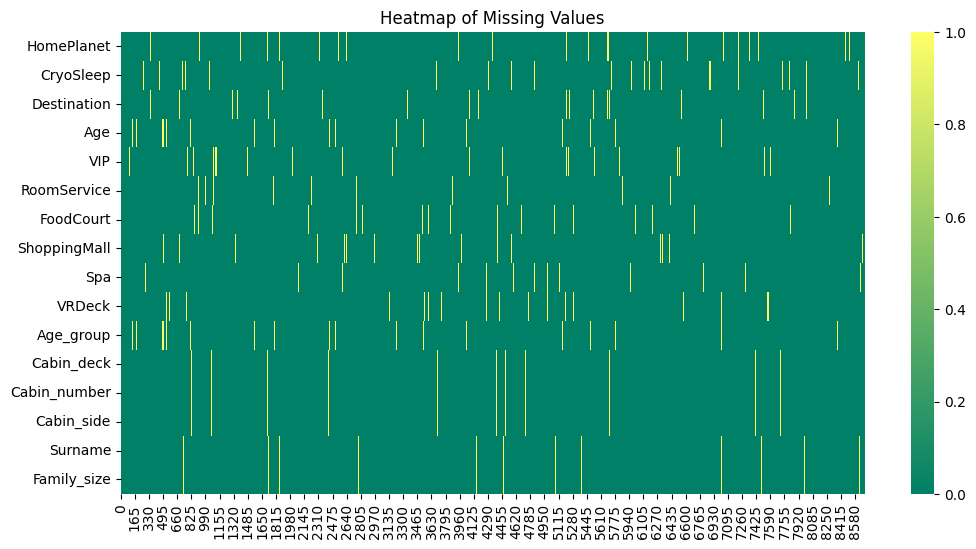

In [182]:
plt.figure(figsize=(12, 6))
sns.heatmap(train[na_cols].isna().T,cmap='summer')
plt.title('Heatmap of Missing Values')
plt.show()

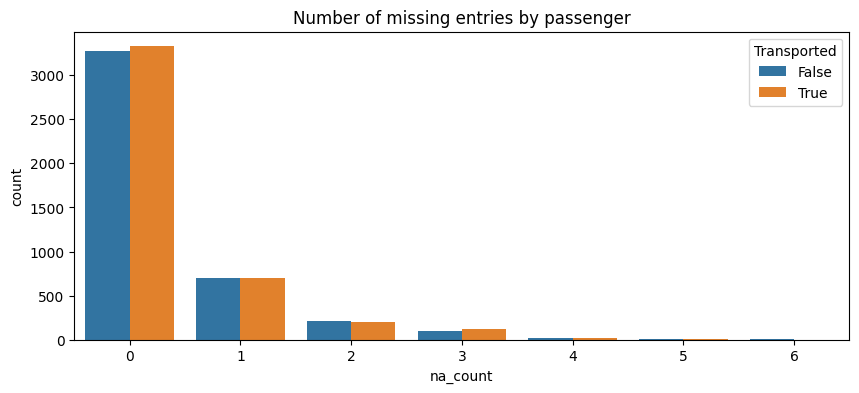

In [183]:
train['na_count']=train.isna().sum(axis=1)
plt.figure(figsize=(10,4))
sns.countplot(data=train, x='na_count', hue='Transported')
plt.title('Number of missing entries by passenger')
train.drop('na_count', axis=1, inplace=True)

***Median for Continuous Variable***

***Mode for Categorical features***

#### Homeplanet and Group

In [184]:
GHP_gb = data.groupby(['Group', 'HomePlanet'])['HomePlanet'].size().unstack().fillna(0)
GHP_gb.head()

HomePlanet,Earth,Europa,Mars
Group,,,
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,2.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
